# Figures and Plots
Running statistics on full dataset to get some of the characteristics.
Author: Karson Chrispens
Requires ab_proj env.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_context("notebook", font_scale = 0.6)
data = pd.read_csv("~/rosetta-antibody-ddgs/raw_datasets/use_this_data.csv")

### Plotting average LD per PDB NOTE: for interface mutations

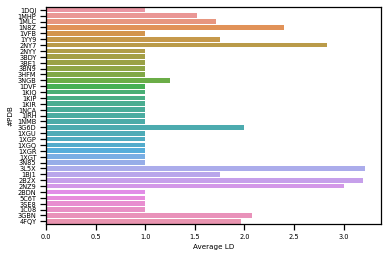

In [15]:
averages = pd.DataFrame()
averages["#PDB"] = data["#PDB"].unique()
averages_list = []
interface_data = data[data["Interface?"] == True]

for pdb in averages["#PDB"]:
    lds = interface_data[interface_data["#PDB"] == pdb]["LD"]
    averages_list.append(sum(lds) / len(lds))

averages["Average LD"] = averages_list
barplot = sns.barplot(x="Average LD", y="#PDB", data = averages)
plt.show()

### Average LD per source


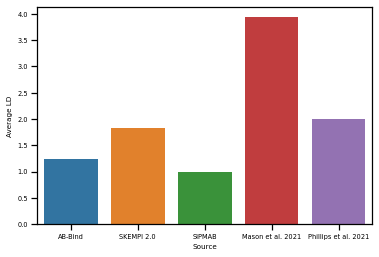

In [16]:
averages = pd.DataFrame()
averages["Source"] = data["Source"].unique()
averages_list = []

for source in averages["Source"]:
    lds = interface_data[interface_data["Source"] == source]["LD"]
    averages_list.append(sum(lds) / len(lds))

averages["Average LD"] = averages_list
barplot = sns.barplot(x="Source", y="Average LD", data=averages)
plt.show()

### Plotting number of mutations to each AA in the whole dataset


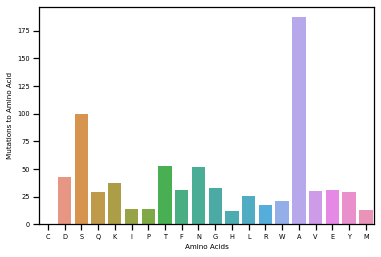

In [17]:
aas = ['C', 'D', 'S', 'Q', 'K',
       'I', 'P', 'T', 'F', 'N',
       'G', 'H', 'L', 'R', 'W',
       'A', 'V', 'E', 'Y', 'M']
muts_to_aa = []

for aa in aas:
    # count regex matches in mutations
    all_mut_aa = interface_data["Mutations"].apply(lambda x: re.findall(
        fr"\w:\w\d+{aa}", x))
    num_mut_per_data = all_mut_aa.apply(len)
    total_mut = sum(num_mut_per_data)
    muts_to_aa.append(total_mut)

data_muts_to_aa = pd.DataFrame(
    data={"Amino Acids": aas, "Mutations to Amino Acid": muts_to_aa})
sns.barplot(x="Amino Acids", y="Mutations to Amino Acid", data=data_muts_to_aa)
plt.show()

### Plotting mutations per PDB


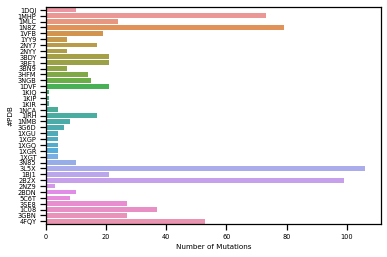

In [18]:
mut_pdbs = pd.DataFrame()
mut_pdbs["#PDB"] = data["#PDB"].unique()
mut_pdbs_list = []

for pdb in mut_pdbs["#PDB"]:
    lds = interface_data[interface_data["#PDB"] == pdb]["LD"]
    mut_pdbs_list.append(sum(lds))

mut_pdbs["Number of Mutations"] = mut_pdbs_list
barplot = sns.barplot(x="Number of Mutations", y="#PDB", data = mut_pdbs)
plt.show()

### Mutations per PDB without Phillips


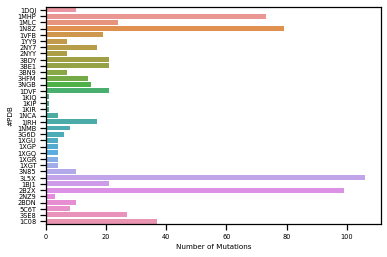

In [19]:
mut_pdbs = mut_pdbs[~(mut_pdbs["#PDB"].str.contains("3GBN") | mut_pdbs["#PDB"].str.contains("4FQY"))]
barplot = sns.barplot(x="Number of Mutations", y="#PDB", data=mut_pdbs)
plt.show()

### Average ddG for interface vs non-interface mutations


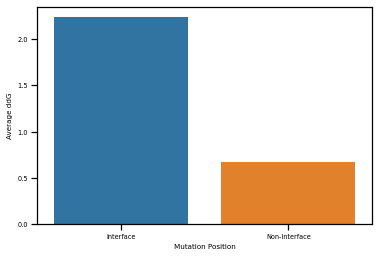

In [20]:
data = pd.read_csv("./raw_datasets/interface_data_use.csv")
non_int = data[data["Interface?"] == False]
interface = data[data["Interface?"] == True]

non_int_avg = sum(non_int["ddG(kcal/mol)"]) / len(non_int)
interface_avg = sum(interface["ddG(kcal/mol)"]) / len(interface)
avgs = pd.DataFrame({
    "Mutation Position": ["Interface", "Non-Interface"],
    "Average ddG": [interface_avg, non_int_avg]
})
barplot = sns.barplot(x = "Mutation Position", y = "Average ddG", data=avgs)
plt.show()

### ddG histogram for interface vs non-interface


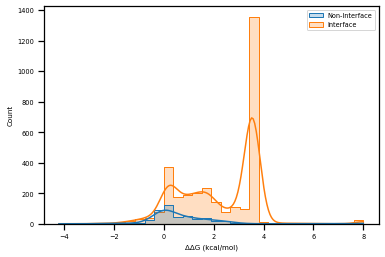

In [21]:
non_int_ddgs = non_int["ddG(kcal/mol)"]
interface_ddgs = interface["ddG(kcal/mol)"]

df = pd.DataFrame({
    "Non-Interface": non_int_ddgs,
    "Interface": interface_ddgs
})

histplot = sns.histplot(data = df, kde = True, element="step")
plt.xlabel("ΔΔG (kcal/mol)")
plt.show()

### Epistatic 1st order coeffs

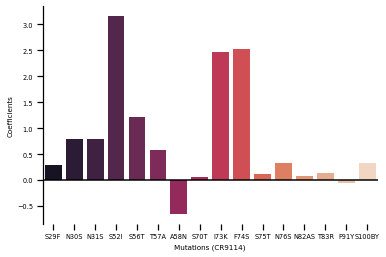

In [30]:
coeff_dict = {
    "S29F": 0.29620232960015264,
    "N30S": 0.7980125108028767,
    "N31S": 0.7945511047351377,
    "S52I": 3.1534573246328,
    "S56T": 1.206309296497863,
    "T57A": 0.5818191866544703,
    "A58N": -0.6496541403257541,
    "S70T": 0.06962278800732419,
    "I73K": 2.4629962706463875,
    "F74S": 2.5137817437253727,
    "S75T": 0.12123731392549425,
    "N76S": 0.3360267429510174,
    "N82AS": 0.08872932391145028,
    "T83R": 0.14462831079363442,
    "F91Y": -0.04742070420420187,
    "S100BY": 0.33575423269144783
}

coeffs = pd.DataFrame({
    "Coefficients": coeff_dict.values(),
    "Mutations": coeff_dict.keys()
})

barplt = sns.barplot(x="Mutations", y="Coefficients", data=coeffs, palette="rocket")
sns.despine(bottom=True)
barplt.axhline(y=0, color="black")
barplt.set_xlabel("Mutations (CR9114)")
plt.show()

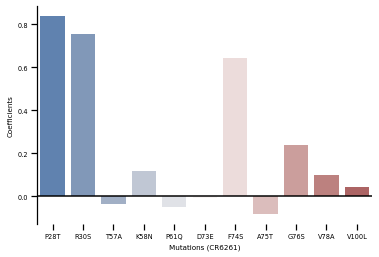

In [32]:
coeff_dict = {
    "P28T": 0.837341564950566,
    "R30S": 0.7541460966005754,
    "T57A": -0.0345329369999683,
    "K58N": 0.11930498851566934,
    "P61Q": -0.050442789001268966,
    "D73E": -0.00649964868499584,
    "F74S": 0.6424008942583567,
    "A75T": -0.08220430609783097,
    "G76S": 0.23617983576184245,
    "V78A": 0.09830564802979372,
    "V100L": 0.04400281039483982
}

coeffs = pd.DataFrame({
    "Coefficients": coeff_dict.values(),
    "Mutations": coeff_dict.keys()
})

barplt = sns.barplot(x="Mutations", y="Coefficients", data=coeffs, palette="vlag")
sns.despine(bottom=True)
barplt.axhline(y=0, color="black")
barplt.set_xlabel("Mutations (CR6261)")
plt.show()

### Epistatic 2nd Order Coeffs